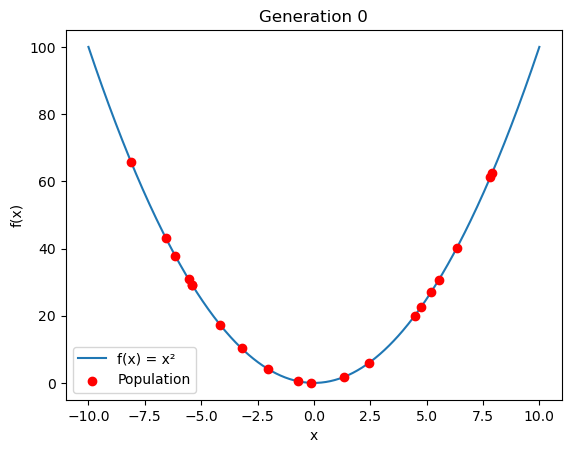

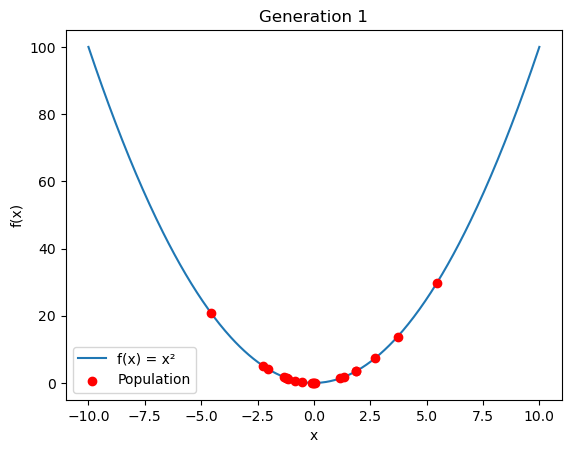

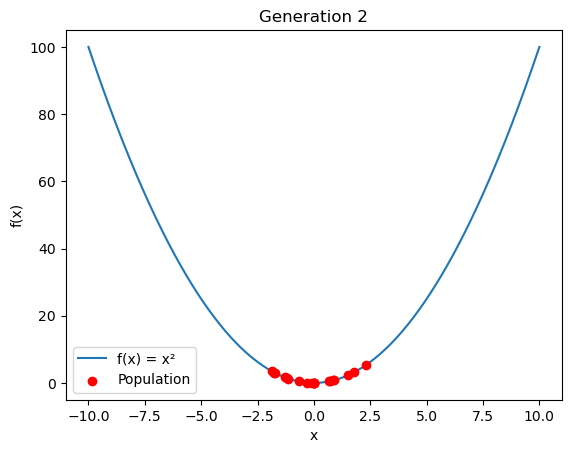

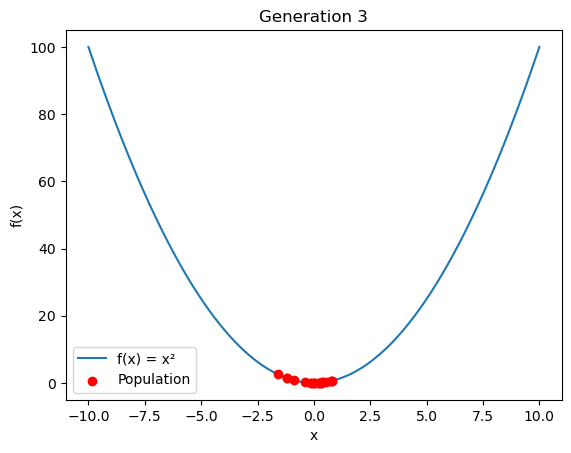

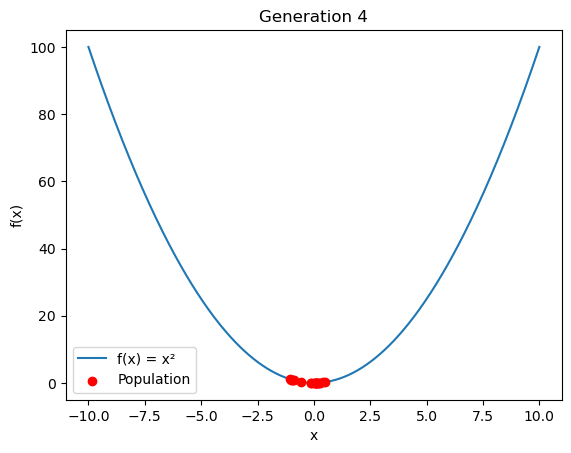

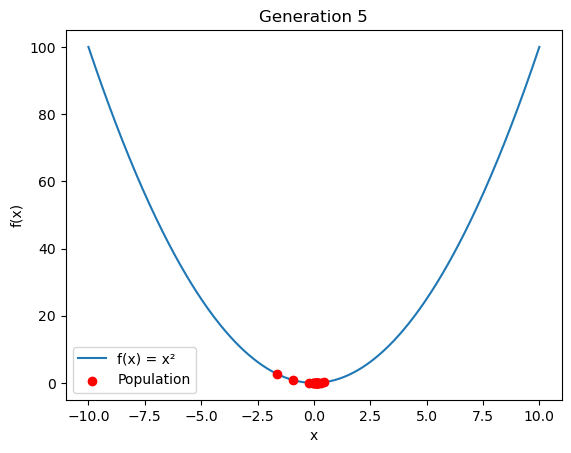

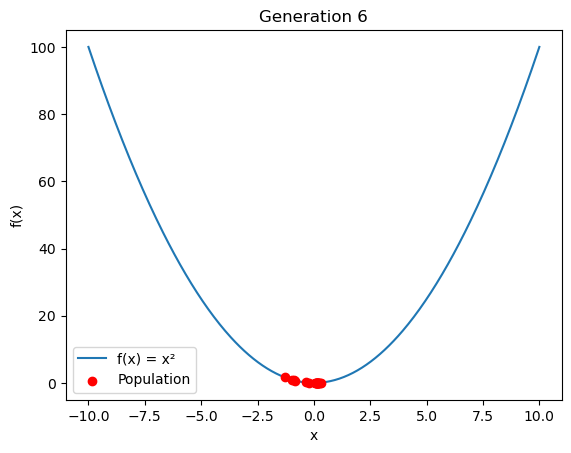

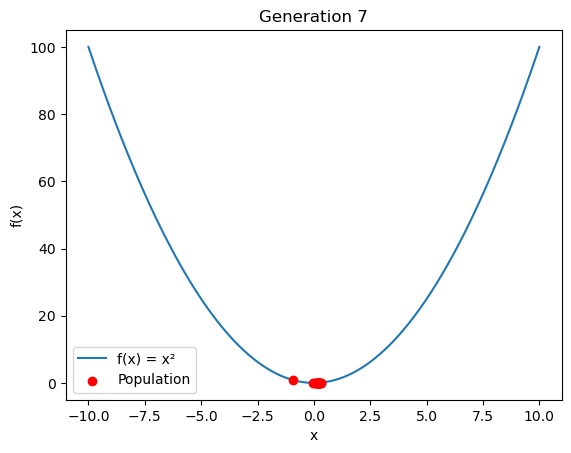

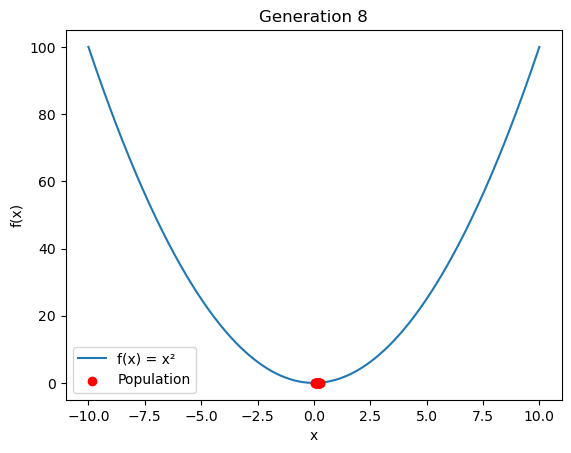

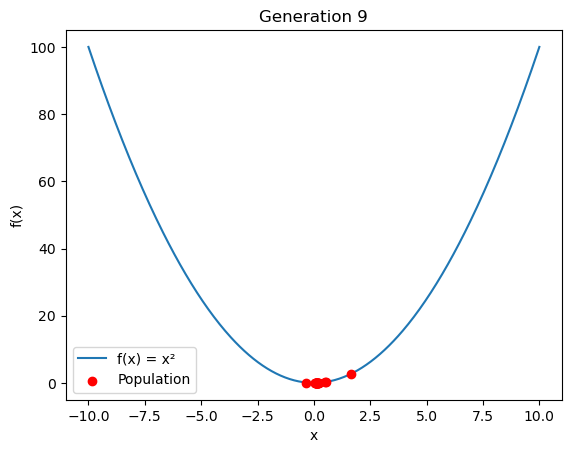

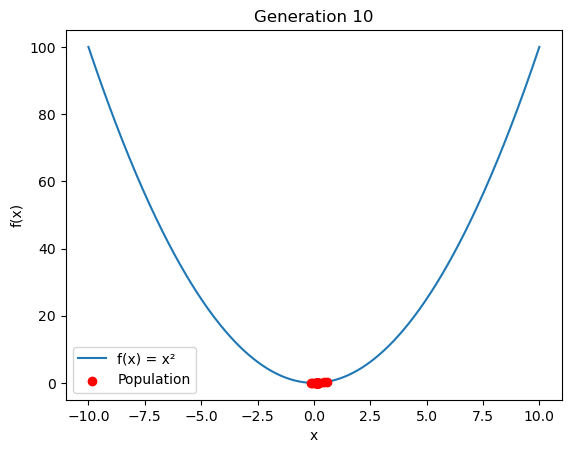

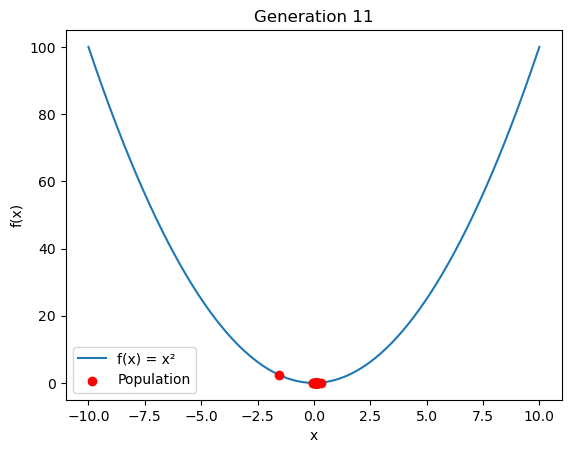

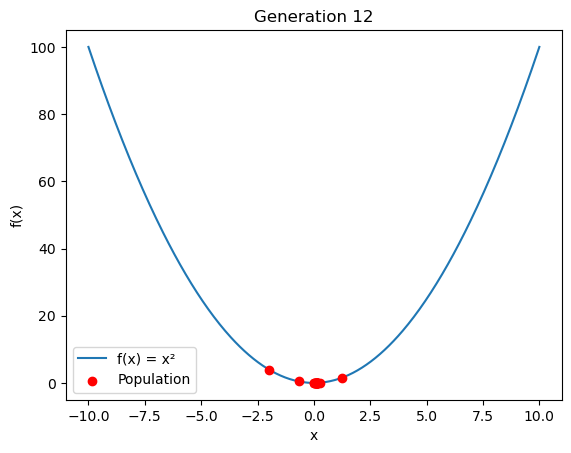

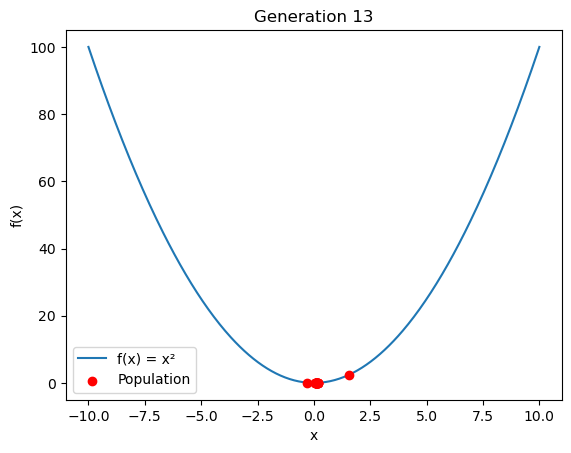

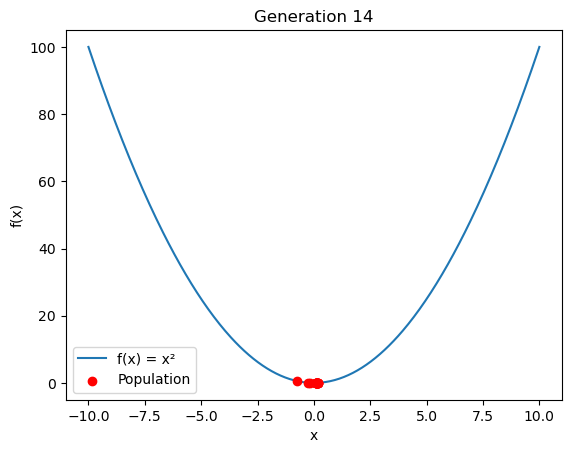

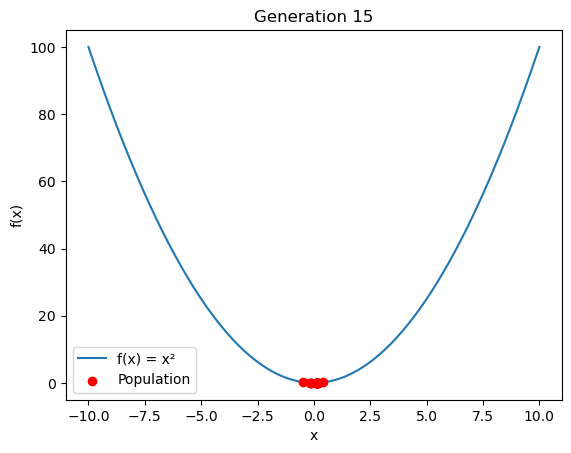

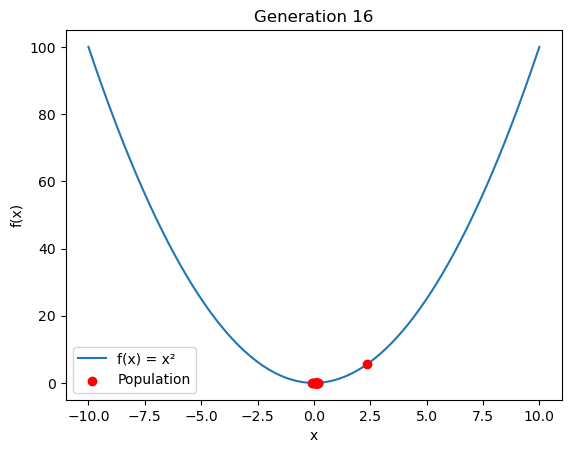

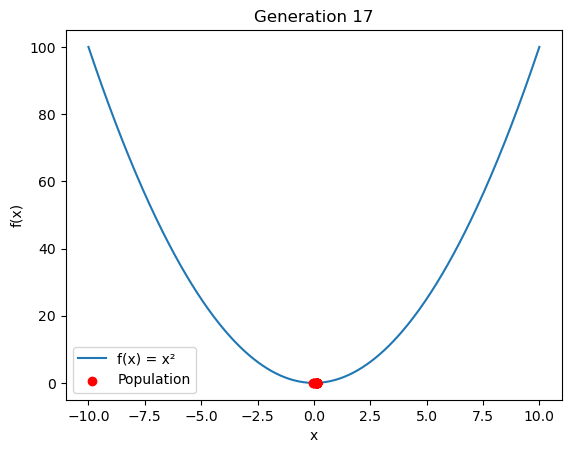

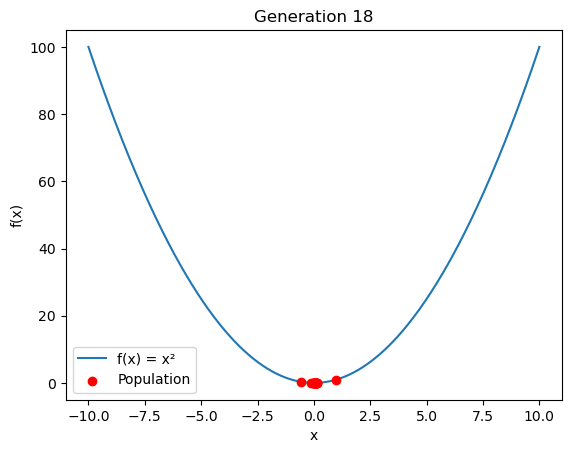

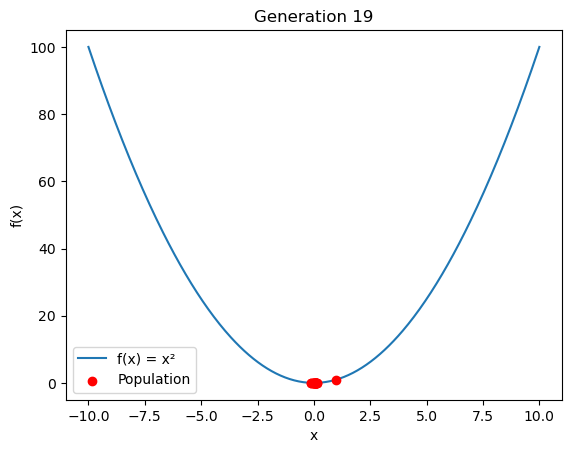

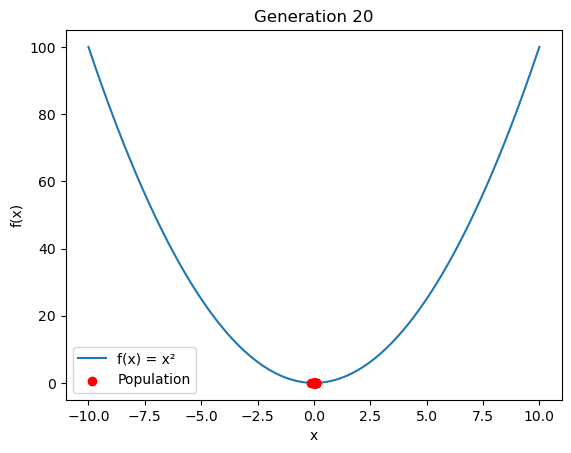

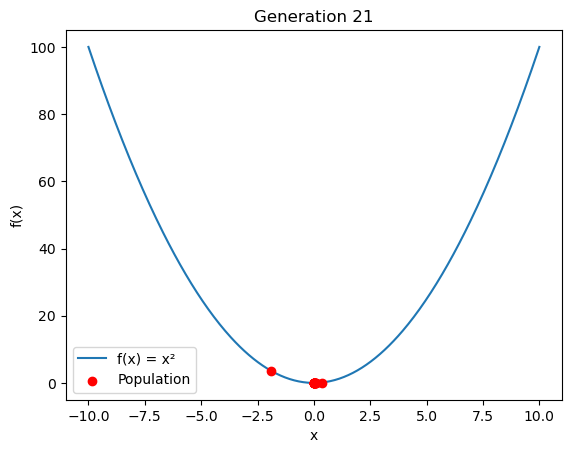

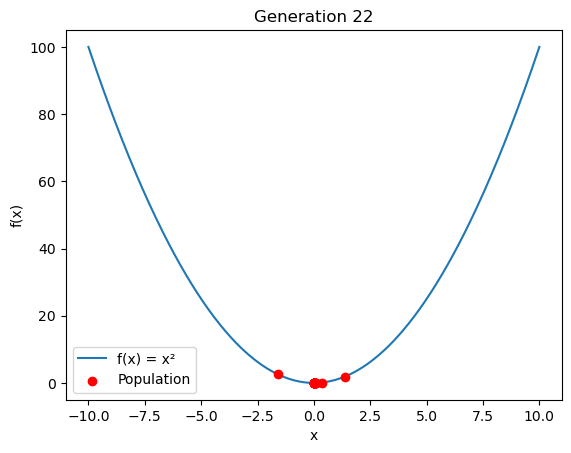

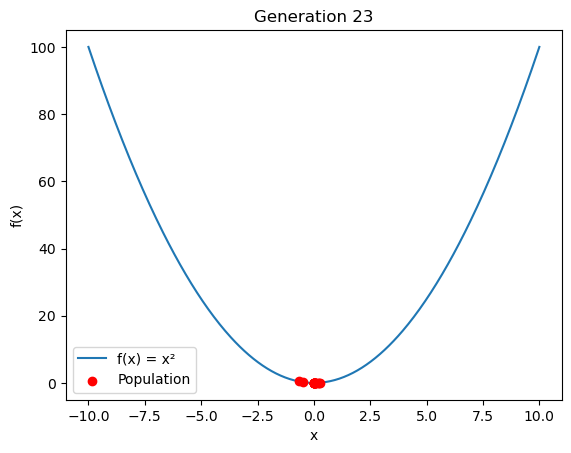

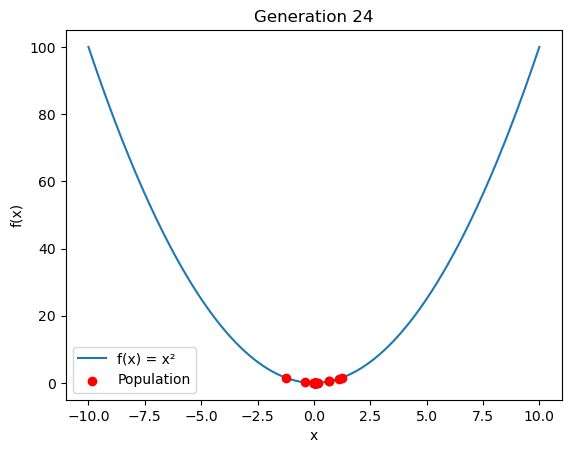

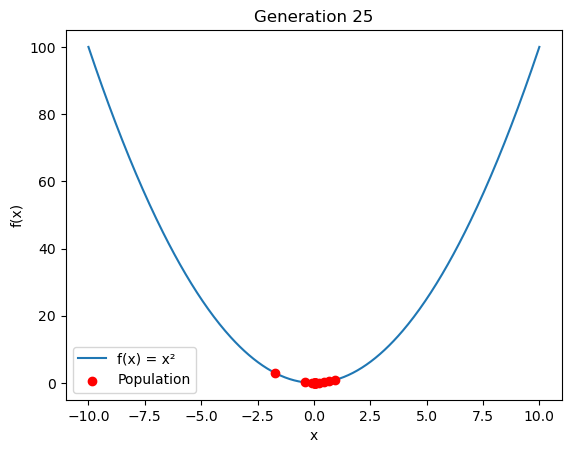

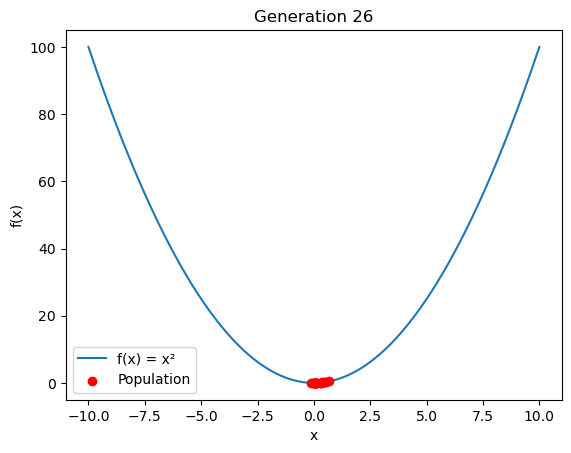

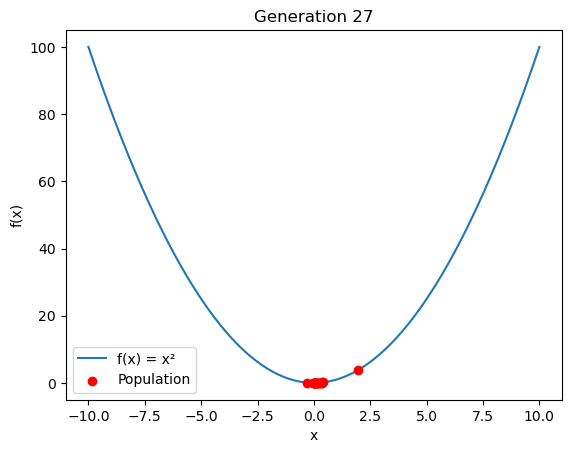

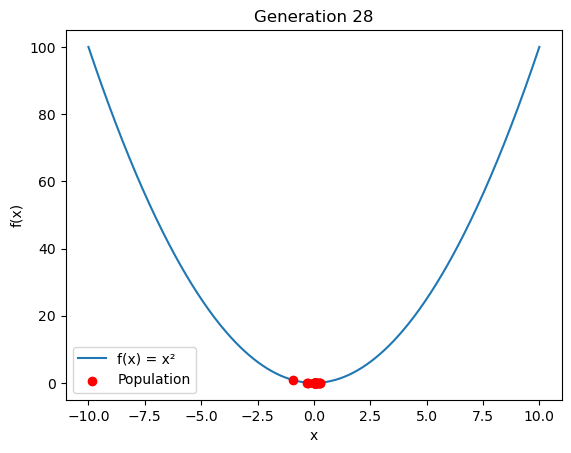

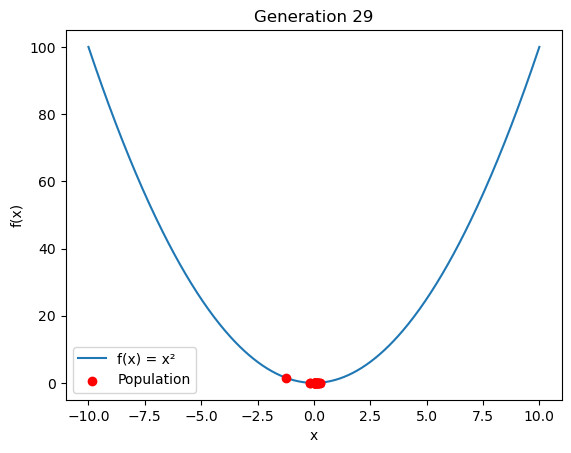

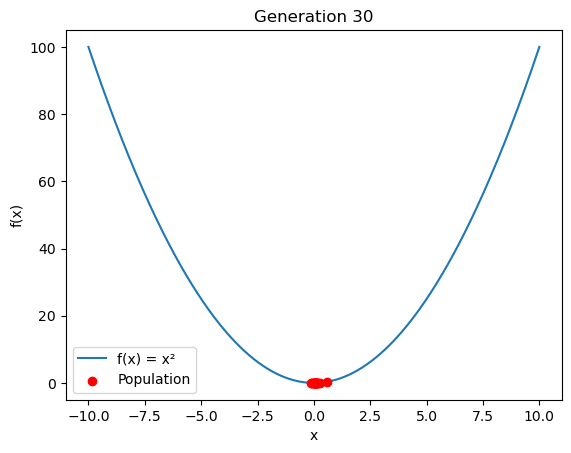

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function
def fitness(x):
    return -x**2  # Negative because we maximize fitness

# Initialize population
def initialize_population(size, bounds):
    return np.random.uniform(bounds[0], bounds[1], size)

# Selection (roulette wheel)
def select(population, fitnesses):
    probs = (fitnesses - fitnesses.min()) + 1e-4
    probs /= probs.sum()
    return np.random.choice(population, size=2, p=probs)

# Crossover (blend)
def crossover(p1, p2):
    alpha = np.random.rand()
    return alpha * p1 + (1 - alpha) * p2

# Mutation (small random tweak)
def mutate(x, mutation_rate=0.1):
    if np.random.rand() < mutation_rate:
        x += np.random.normal(0, 1)
    return np.clip(x, -10, 10)

# Genetic Algorithm
def genetic_algorithm(generations=30, pop_size=20, bounds=(-10, 10)):
    population = initialize_population(pop_size, bounds)
    history = [population.copy()]

    for gen in range(generations):
        fitnesses = np.array([fitness(x) for x in population])
        new_pop = []

        for _ in range(pop_size):
            p1, p2 = select(population, fitnesses)
            child = crossover(p1, p2)
            child = mutate(child)
            new_pop.append(child)

        population = np.array(new_pop)
        history.append(population.copy())

    return history

# Visualization
def visualize(history):
    x = np.linspace(-10, 10, 400)
    y = x**2

    for gen, pop in enumerate(history):
        plt.clf()
        plt.plot(x, y, label="f(x) = x²")
        plt.scatter(pop, pop**2, color='red', label="Population", zorder=5)
        plt.title(f"Generation {gen}")
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.legend()
        plt.pause(0.3)
    plt.show()

# Run it
history = genetic_algorithm()
visualize(history)
